In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_excel("Superstore Dataset.xlsx", 'Orders')
ret = pd.read_excel("Superstore Dataset.xlsx", 'Returns') #returned dat does not connect to the superstore dataset !?!?!?

In [3]:
ret.head()

,Returned,Order ID
0,Yes,CA-2015-100762
1,Yes,CA-2015-100762
2,Yes,CA-2015-100762
3,Yes,CA-2015-100762
4,Yes,CA-2015-100867


In [5]:
dat.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432
4,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,132.5922


### people that purchased items in categories 

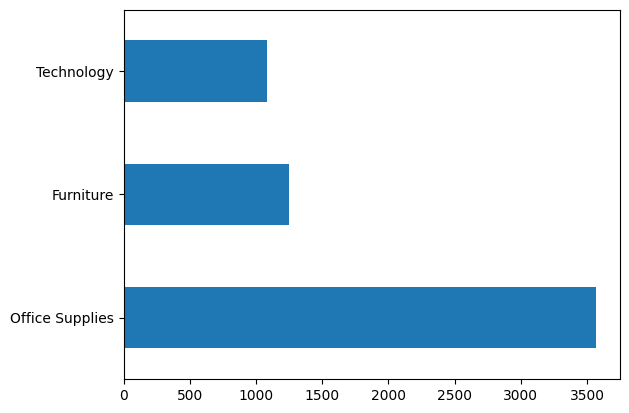

In [6]:
dat["Category"].value_counts().plot(kind='barh');


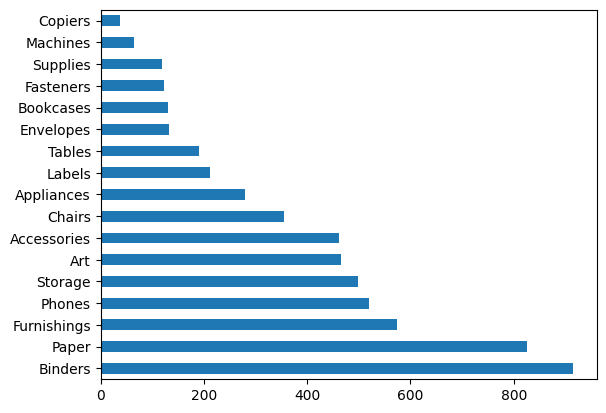

In [7]:
dat["Sub-Category"].value_counts().plot(kind='barh');

### most items bought and most sales of items (most sales of items todo:plot)

In [41]:
q= (dat[dat["Sub-Category"] == "Phones"].groupby("Product Name")[["Quantity", "Sales"]]
                                    .agg(sum)
                                    .sort_values(by=["Quantity"], ascending=False)
                                )
s = (dat[dat["Sub-Category"] == "Phones"].groupby("Product Name")[["Quantity", "Sales"]]
                                    .agg(sum)
                                    .sort_values(by=["Sales"], ascending=False)
                                    .reset_index()
                                    .head(20)
                                )                                                

In [42]:
s

,Product Name,Quantity,Sales
0,Samsung Galaxy Mega 6.3,34,12263.708
1,Apple iPhone 5,15,7667.994
2,Samsung Galaxy S III - 16GB - pebble blue (T-M...,19,4829.862
3,Samsung Galaxy Note 2,14,4507.902
4,Wilson Electronics DB Pro Signal Booster,17,4439.200
5,Samsung Galaxy S4 Mini,10,4229.910
6,Polycom CX600 IP Phone VoIP phone,15,4139.310
7,Mitel MiVoice 5330e IP Phone,20,4124.850
8,GE 30524EE4,24,4037.394
9,Samsung Galaxy S4,8,4006.336


In [30]:
def plot_quantity(df, x, y):
  pl = df[df["Quantity"] > 20].reset_index()
  sns.barplot(data=pl, x=x, y=y)

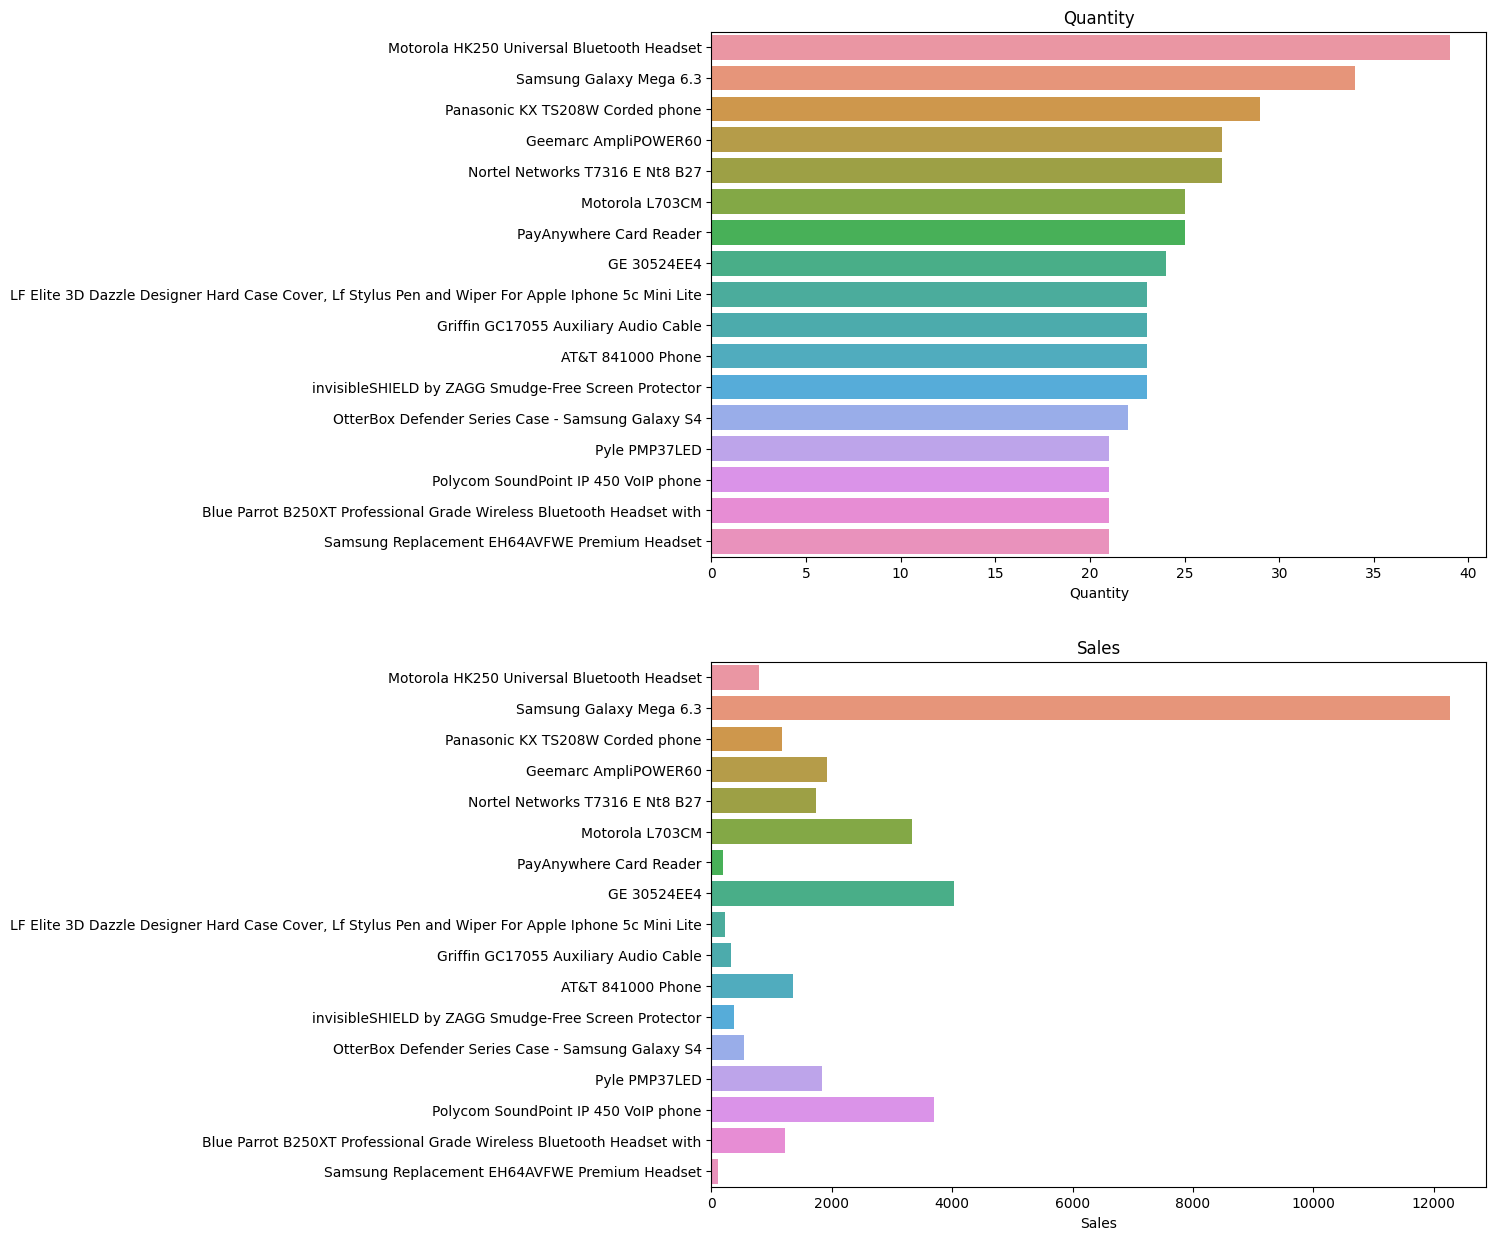

In [20]:
plt.figure(figsize=(10, 15))
plt.subplot(211)
plot_quantity(q, "Quantity", "Product Name")
plt.title("Quantity")
plt.ylabel("")
plt.subplot(212)
plot_quantity(q, "Sales", "Product Name")
plt.title("Sales")
plt.ylabel("");

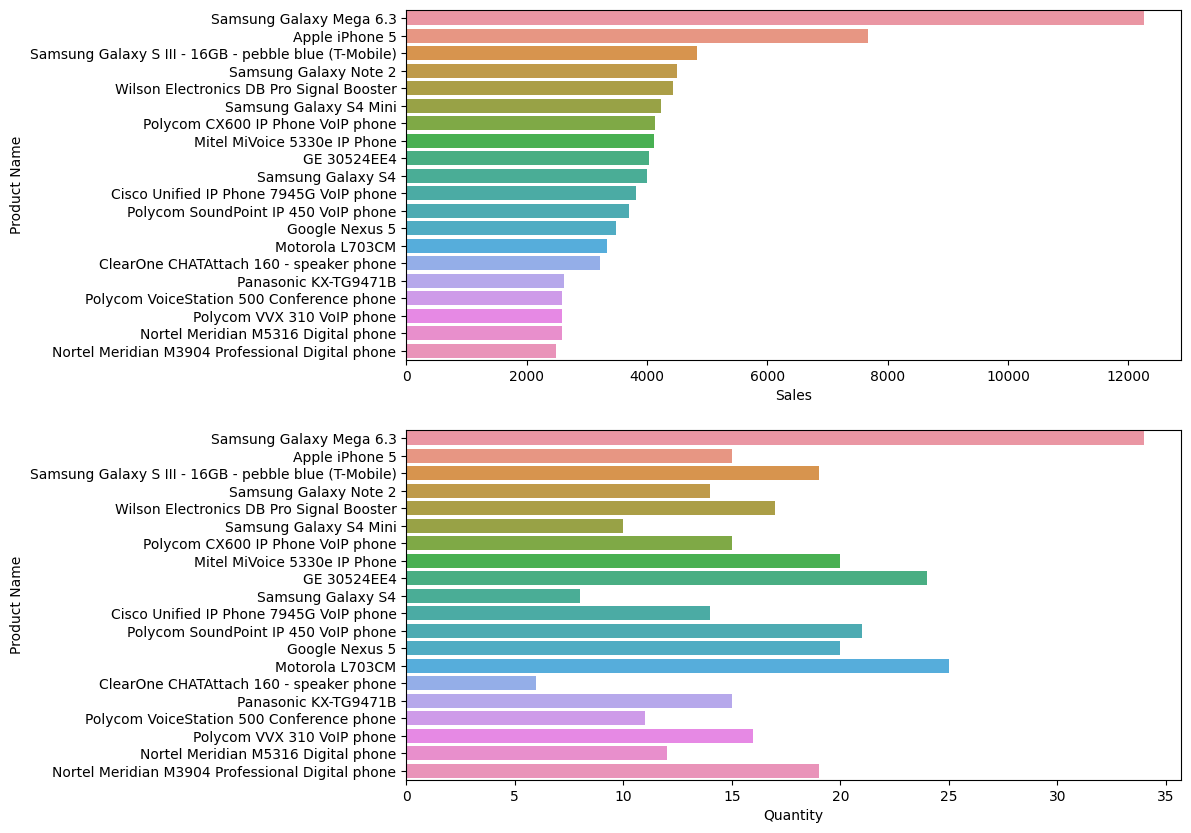

In [46]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
sns.barplot(data=s, x="Sales", y="Product Name")
plt.subplot(212)
sns.barplot(data=s, x="Quantity", y='Product Name');

### what shipping type made the most profit 

In [11]:
dat["Ship Mode"].value_counts()

Standard Class    3449
Second Class      1147
First Class        959
Same Day           344
Name: Ship Mode, dtype: int64

In [130]:
dat.groupby("Ship Mode")["Profit"].sum().sort_values(ascending=False)

Ship Mode
Standard Class    99739.7266
Second Class      36936.0265
First Class       29749.8665
Same Day           8808.8243
Name: Profit, dtype: float64

In [127]:
dat.head(1)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,month,Year
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,41.9136,11,2019


### trend of profit in 2019 and 2020 for each segments

In [13]:
dat["Segment"].value_counts()

Consumer       2996
Corporate      1773
Home Office    1130
Name: Segment, dtype: int64

In [83]:
dat["month"] = dat["Order Date"].dt.month
dat["Year"] = dat["Order Date"].dt.year

In [91]:
consumer_dat = dat[dat["Segment"] == "Consumer"].sort_values(by="Order Date")
corporate_dat = dat[dat["Segment"] == "Corporate"].sort_values(by="Order Date")
home_office_dat = dat[dat["Segment"] == "Home Office"].sort_values(by="Order Date")

In [97]:
def year_df(df, year):
  df = df[df["Year"] == year]
  return df

In [99]:
consumer_dat_2019 = year_df(consumer_dat, 2019)
consumer_dat_2020 = year_df(consumer_dat, 2020)
corporate_dat_2019 = year_df(corporate_dat, 2019)
corporate_dat_2020 = year_df(corporate_dat, 2020)
home_office_dat_2019 = year_df(home_office_dat, 2019)
home_office_dat_2020= year_df(home_office_dat, 2020)

Text(0.5, 1.0, 'profit in 2020')

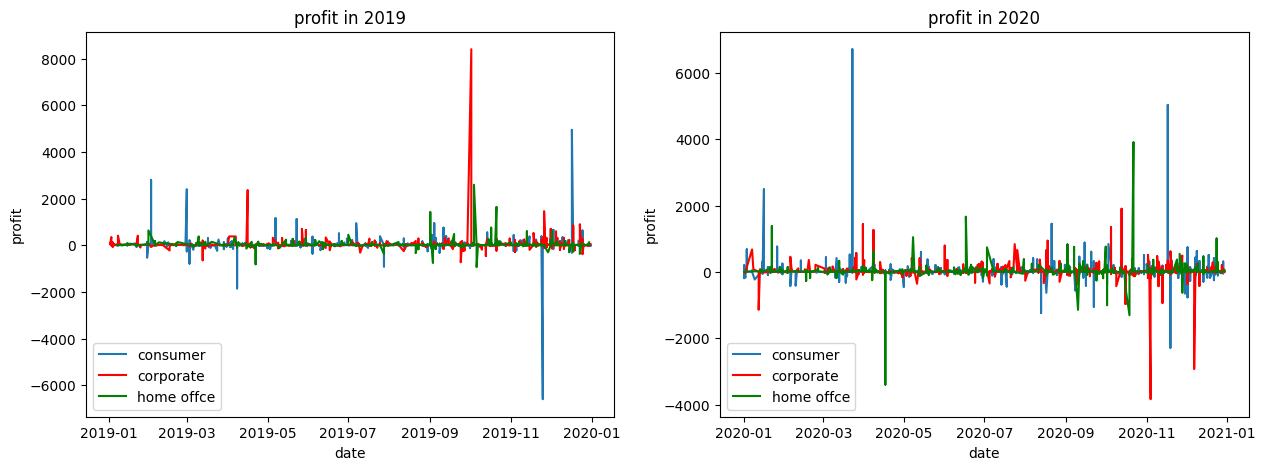

In [126]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(consumer_dat_2019["Order Date"], consumer_dat_2019.Profit)
plt.plot(corporate_dat_2019["Order Date"], corporate_dat_2019.Profit, color='r')
plt.plot(home_office_dat_2019["Order Date"], home_office_dat_2019.Profit, color='g')
plt.legend(["consumer", "corporate", "home offce"], loc=3)
plt.ylabel("profit")
plt.xlabel("date")
plt.title("profit in 2019")
plt.subplot(1,2,2)
plt.plot(consumer_dat_2020["Order Date"], consumer_dat_2020.Profit)
plt.plot(corporate_dat_2020["Order Date"], corporate_dat_2020.Profit, color='r')
plt.plot(home_office_dat_2020["Order Date"], home_office_dat_2020.Profit, color='g')
plt.legend(["consumer", "corporate", "home offce"])
plt.ylabel("profit")
plt.xlabel("date")
plt.title("profit in 2020")